In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
data=pd.read_csv("Car details.csv")

# Data Preparation

Treating Missing values

In [5]:
total=data.isnull().sum().sort_values(ascending=False)
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,Percent],axis=1,keys=['Total','Percentage of missing'])   
missing_data

,Total,Percentage of missing
torque,222,2.731299
mileage,221,2.718996
engine,221,2.718996
seats,221,2.718996
max_power,215,2.645177
name,0,0.000000
year,0,0.000000
selling_price,0,0.000000
km_driven,0,0.000000
fuel,0,0.000000


In [6]:
data.shape

(8128, 13)

In [7]:
data.dropna(inplace=True)

In [9]:
data.shape
data.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [10]:
data=data.drop('name',axis=1)

In [11]:
data.drop_duplicates(inplace=True,keep='first',subset=None)

In [12]:
data.shape

(6698, 12)

In [13]:
data.mileage=data.mileage.str.replace('kmpl','')
data.mileage=data.mileage.str.replace('km/kg','')
data.engine=data.engine.str.replace('CC','')
data.max_power=data.max_power.str.replace('bhp','')

In [14]:
data['torque']=data.torque.str.extract(('(^\d*)'))

In [15]:
data['mileage']=data.mileage.astype(float)
data['engine']=data.engine.astype(int)
data['max_power']=data.max_power.astype(float)
data['max_power']=data.max_power.astype(int)
data['torque']=data.torque.astype(int)

In [16]:
data['current_year']=2021
year_driven=data['current_year']-data['year']
data['year_driven']=year_driven
data.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,current_year,year_driven
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,190,5.0,2021,7
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103,250,5.0,2021,7


In [17]:
data=data.drop(['year','current_year'],axis=1)
data.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,year_driven
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,190,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103,250,5.0,7


In [18]:
data['seats']=data.seats.astype(int)

Splitting data in number and categories

In [19]:
data_num=data.select_dtypes(include=[np.number])
data_cat=data.select_dtypes(exclude=[np.number])

In [20]:
data_cat_dum=pd.get_dummies(data_cat,drop_first=True)

# Outlier Checking

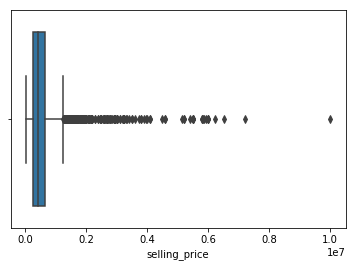

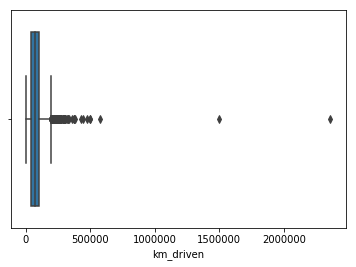

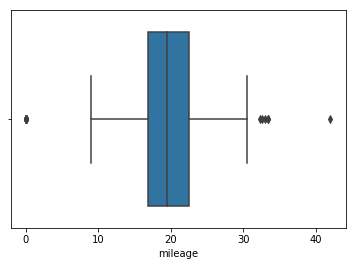

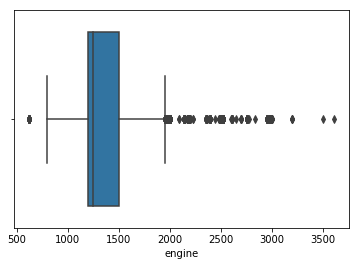

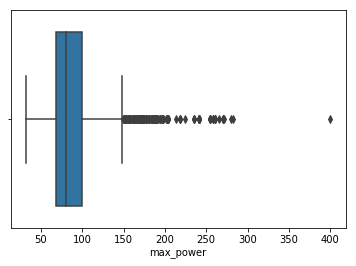

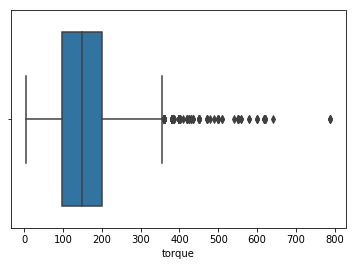

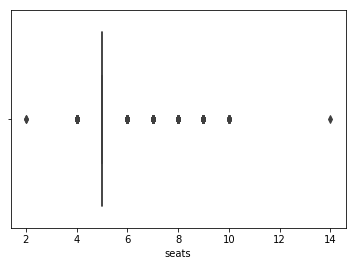

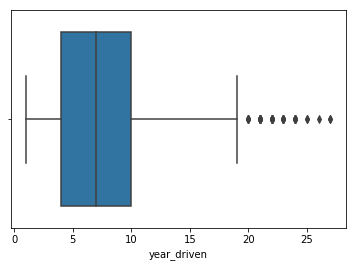

In [15]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.show()

In [21]:
seats=data_num['seats']

In [22]:
data_num=data_num.drop("seats",axis=1)

In [23]:
data_num.head(2)

,selling_price,km_driven,mileage,engine,max_power,torque,year_driven
0,450000,145500,23.40,1248,74,190,7
1,370000,120000,21.14,1498,103,250,7


In [24]:
year_driven=data_num['year_driven']
data_num=data_num.drop('year_driven',axis=1)
data_num.head(2)

,selling_price,km_driven,mileage,engine,max_power,torque
0,450000,145500,23.40,1248,74,190
1,370000,120000,21.14,1498,103,250


In [25]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data_num = data_num[~((data_num < (Q1 - 1.5 * IQR)) | (data_num > (Q3 + 1.5 * IQR))).any(axis=1)]

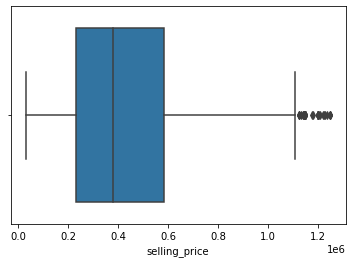

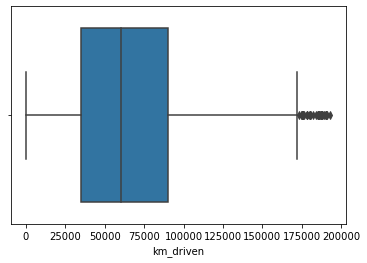

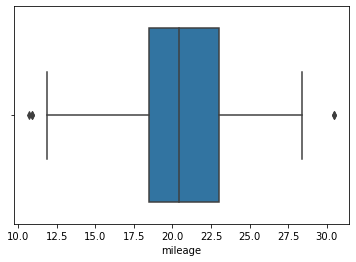

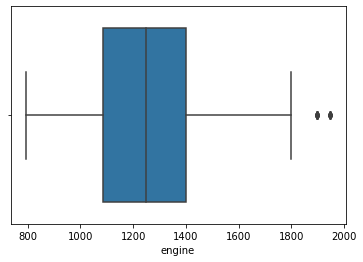

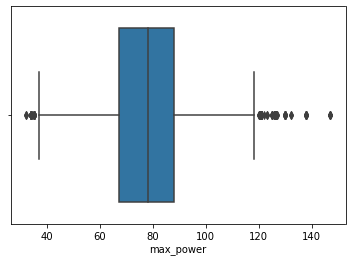

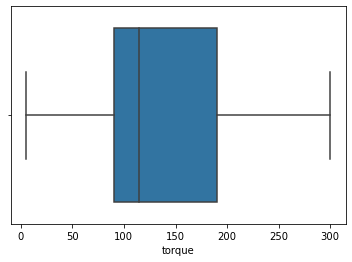

In [26]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.show()

# Scaling of Data

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledata=sc.fit_transform(data_num)

In [28]:
scaleddata=pd.DataFrame(scaledata,columns=data_num.columns,index=data_num.index)

In [29]:
scaleddata.head()

,selling_price,km_driven,mileage,engine,max_power,torque
0,0.120168,2.067956,0.849976,0.072075,-0.253166,0.838616
1,-0.215395,1.405748,0.161774,1.165198,1.251361,1.792886
2,-1.104636,1.925127,-0.885755,1.160825,-0.045645,-1.992388
3,-0.823602,1.587531,0.728170,0.719204,0.576918,-1.833342
4,-1.222083,1.405748,-1.372978,0.290699,0.473157,-2.008292


In [30]:
scaleddata.isnull().sum()

selling_price    0
km_driven        0
mileage          0
engine           0
max_power        0
torque           0
dtype: int64

In [31]:
sindex=scaleddata.index
sindex

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8115, 8116, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125],
           dtype='int64', length=5367)

In [32]:
data_cat_upd=data_cat_dum.loc[sindex]
seat_upd=seats.loc[sindex]
yearsdrive=year_driven.loc[sindex]

In [33]:
final_data=pd.concat([scaleddata,data_cat_upd,seat_upd,yearsdrive],1)

In [34]:
final_data.isna().sum()

selling_price                   0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
torque                          0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
seats                           0
year_driven                     0
dtype: int64

In [32]:
final_data.head(2)

,selling_price,km_driven,mileage,engine,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats,year_driven
0,0.120168,2.067956,0.849976,0.072075,-0.253166,0.838616,1,0,0,1,0,1,0,0,0,0,5,7
1,-0.215395,1.405748,0.161774,1.165198,1.251361,1.792886,1,0,0,1,0,1,0,1,0,0,5,7


In [35]:
final_data.shape

(5367, 18)

In [36]:
final=final_data.copy()
x=final.drop(['selling_price'],axis=1)
y=final['selling_price']

In [38]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = 0.3)
print('X_train_full', X_train.shape)
print('y_train_full', y_train.shape)

# print dimension of test set
print('X_test_full', X_test.shape)
print('y_test_full', y_test.shape)

X_train_full (3756, 17)
y_train_full (3756,)
X_test_full (1611, 17)
y_test_full (1611,)


# Performing Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Model evaluation

In [40]:
print(lm.intercept_)

0.7449462158751627


In [41]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
km_driven,-1.473045e-01
mileage,-6.863089e-03
engine,-8.273300e-02
max_power,3.881137e-01
torque,1.501154e-01
fuel_Diesel,2.859036e-01
fuel_LPG,1.704897e-01
fuel_Petrol,-2.440994e-02
seller_type_Individual,-5.725388e-02
seller_type_Trustmark Dealer,3.397403e-01


# Prediction

In [42]:
y_pred = lm.predict(X_test)

# Calculating Errors

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [44]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.27217753759512237
r_square_value : 0.7385836138193292


In [45]:
import statsmodels.api as sm
X_train_sm = X_train
 
X_train_sm = sm.add_constant(X_train_sm)

lm_1 = sm.OLS(y_train,X_train_sm).fit()


lm_1.params

const                           7.449462e-01
km_driven                      -1.473045e-01
mileage                        -6.863089e-03
engine                         -8.273300e-02
max_power                       3.881137e-01
torque                          1.501154e-01
fuel_Diesel                     2.859036e-01
fuel_LPG                        1.704897e-01
fuel_Petrol                    -2.440994e-02
seller_type_Individual         -5.725388e-02
seller_type_Trustmark Dealer    3.397403e-01
transmission_Manual            -2.666717e-01
owner_Fourth & Above Owner     -6.032991e-02
owner_Second Owner             -1.850977e-01
owner_Test Drive Car            1.345247e-16
owner_Third Owner              -1.634981e-01
seats                           5.846399e-02
year_driven                    -1.095689e-01
dtype: float64

In [46]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     669.6
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        11:56:08   Log-Likelihood:                -2756.3
No. Observations:                3756   AIC:                             5547.
Df Residuals:                    3739   BIC:                             5652.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

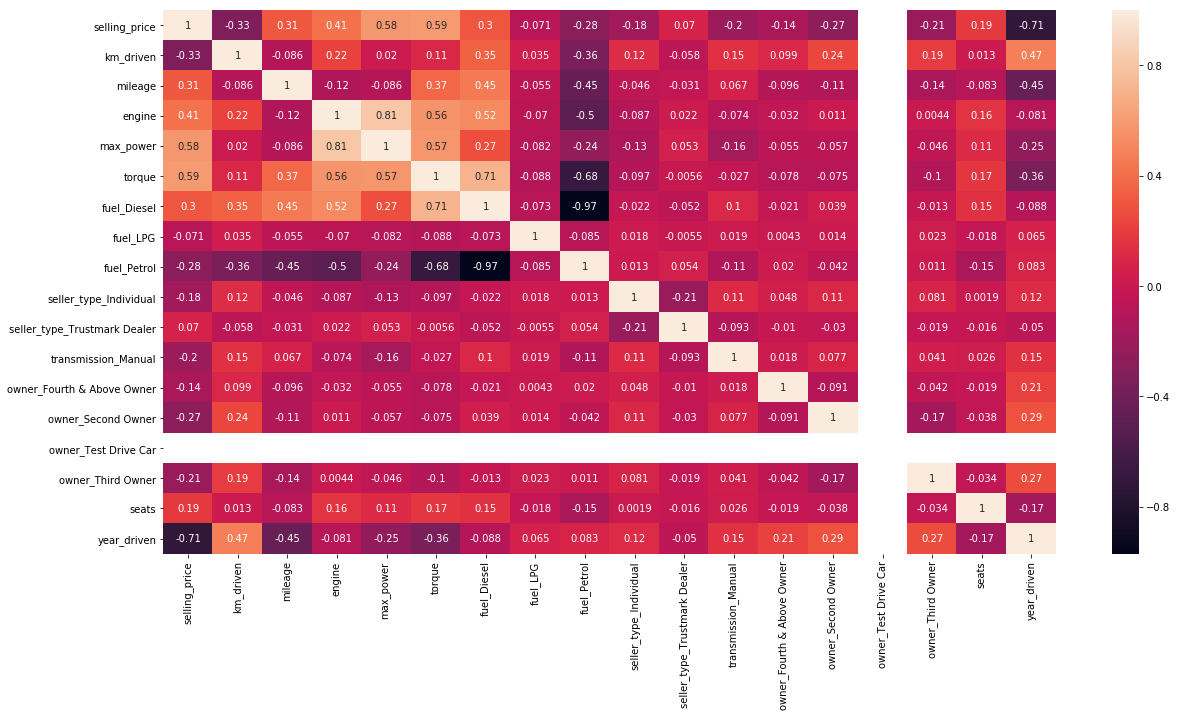

In [49]:
plt.figure(figsize = (20,10))
sns.heatmap(final.corr(),annot = True)

# Error visualize

Text(0.5,0.98,'Actual and Predicted')

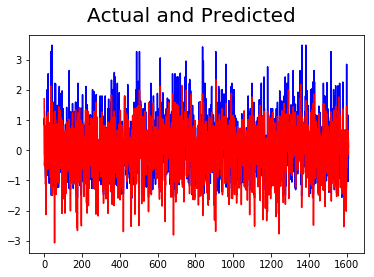

In [57]:
c = [i for i in range(0,len(y_test),1)]
fig = plt.figure()
#plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")

plt.plot(c,y_test,color='blue')
plt.plot(c,y_pred,color='red')
#plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
#plt.xlabel('Index', fontsize=18)                               # X-label
#plt.ylabel('Sales', fontsize=16)

In [64]:
type(y_test)

pandas.core.series.Series

In [73]:
err = pd.concat([y_test, pd.DataFrame(y_pred, columns=['Pred_selling price'])], axis=1)